In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import time
import itertools
from NEF_RL import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [2]:
neurons = [100]
rln2 = pd.read_pickle("data/RL_n2_carrabin_feb9_dynamics.pkl")
target_alphas = pd.read_pickle("data/RL_n2_carrabin_feb9_params.pkl")['mu'].to_numpy()
human = pd.read_pickle("data/carrabin.pkl")
rln2['neurons'] = 'RLn2'
human['neurons'] = 'human'
dfs = [human, rln2]
for n in neurons:
    nef = pd.read_pickle(f"data/NEF_RL_carrabin_rln2_{n}neurons_dynamics.pkl")
    nef['neurons'] = str(n)
    dfs.append(nef)
combined = pd.concat(dfs, ignore_index=True)

In [4]:
combined['excursion'] = None
for sid in human['sid'].unique():
    print(sid)
    subdata = combined.query("sid==@sid")
    for i, row in subdata.iterrows():
        mt = row['type']
        sid = row['sid']
        qid = row['qid']
        response = row['response']
        neurons = row['neurons']
        avg_response = subdata.query("type==@mt & sid==@sid & neurons==@neurons & qid==@qid")['response'].mean()
        combined.at[i, 'excursion'] = response - avg_response
combined.to_pickle("data/alphas_RLn2_NEF_RL_neurons.pkl")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


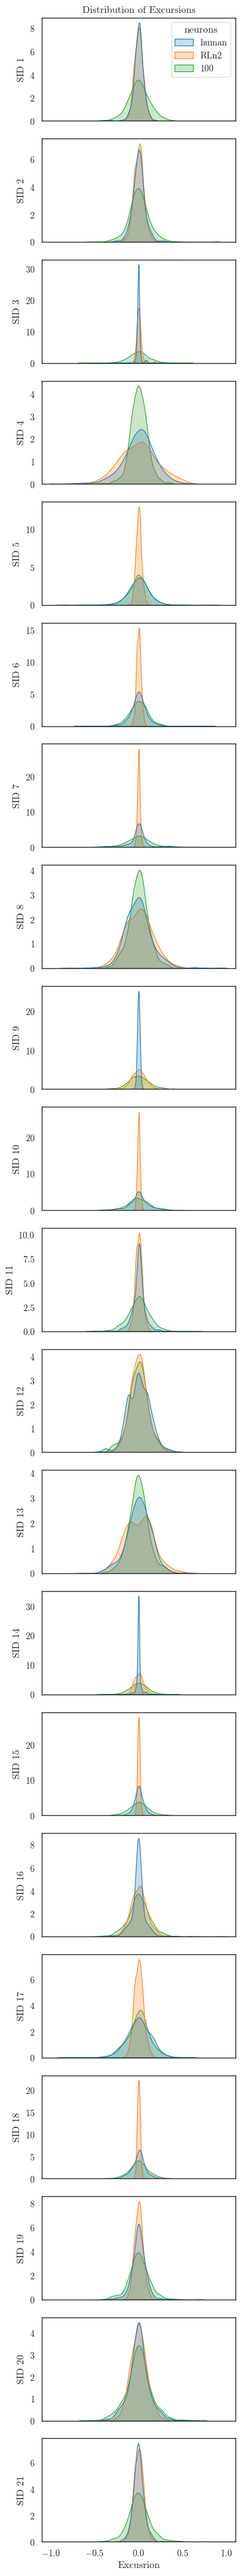

In [5]:
sids = human['sid'].unique()
fig, axes = plt.subplots(nrows=len(sids), ncols=1, figsize=(4, 2*len(sids)), sharex=True)
for s, sid in enumerate(sids):
    sns.kdeplot(combined.query("sid==@sid"), x='excursion', hue='neurons', ax=axes[s],
                clip=[-1, 1], palette=palette[:3], fill=True, common_norm=False)
    axes[s].set(ylabel=f"SID {sid}")  # , ylim=[0, 20]
    if s>0: axes[s].get_legend().remove()
axes[0].set(title='Distribution of Excursions')
axes[-1].set(xlabel='Excusrion')
plt.tight_layout()
fig.savefig("plots/excursion_distributions_all_sids.jpg", dpi=600)

## All sids, all qids

In [2]:
combined = pd.read_pickle("data/alphas_RLn2_NEF_RL_neurons.pkl")
combined

,type,sid,trial,stage,qid,color,response,neurons,excursion
0,human,1,1,1,1,1.0,0.500000,human,0.372158
1,human,1,1,2,10,-1.0,0.000000,human,-0.00478
2,human,1,1,3,100,-1.0,-0.500000,human,-0.34656
3,human,1,1,4,1000,-1.0,-0.598000,human,-0.288
4,human,1,1,5,10000,-1.0,-0.800000,human,-0.237714
...,...,...,...,...,...,...,...,...,...
62260,NEF_RL,21,200,1,1,NaN,0.192439,100,0.000808
62261,NEF_RL,21,200,2,11,NaN,0.322850,100,-0.016902
62262,NEF_RL,21,200,3,111,NaN,0.376001,100,-0.086219
62263,NEF_RL,21,200,4,1111,NaN,0.431741,100,-0.11069


In [ ]:
g = sns.FacetGrid(combined, col="qid", row="sid", hue="neurons")
g.map_dataframe(sns.kdeplot, x="excursion", fill=True, common_norm=False)